In [ ]:
import re
import gc
import datetime
import matplotlib.pyplot as plt 

%matplotlib inline

from functools import reduce
from google.colab import drive

drive.mount('/content/drive')
gc_folder = '/content/drive/MyDrive/Egor/study/session4-2/Python'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Блок 2. Индивидуальные задания 1-4

In [ ]:
def function (string):
  return len(re.findall(r'\b[ОоЭэ]\w+', string))

print(function('Сказала Ольга: "Это верно ,что 2+2=4"'))
print(function('Это надо знать. Это - классика'))

NameError: ignored

In [ ]:
def function(string):
  return len(re.findall(r'\w[\w-]*', string))

print(function('""Он --- серо-буро-малиновый слон!!>>>:->А не кот.""'))
print(function('""Он - человек!!>>>:->А не кот.""'))

6
5


In [ ]:
def function(string):
  return len(re.findall(r'[А-Я]{2,}', string))

print(function(' А курс информатики в вузе соответствует ФГОС и ПООП, что подтверждено ФГУ'))
print(function(' СССР и США'))

3
2


In [ ]:
def function(string):
  words = re.findall(r'\w[^A-Z]+', string)

  snake_case_string = ''
  for index, word in enumerate(words):
    snake_case_string += f'{word.lower()}_' if index < len(words) - 1 else word.lower()

  return snake_case_string

print(function('camelCaseVar'))
print(function('myWonderfulVar'))

camel_case_var
my_wonderful_var


Блок 2. Индивидуальное задание 5

In [ ]:
n_log1_file = open(gc_folder + '/lab_works_files/n_log1.txt', 'r')
n_out1_file = open(gc_folder + '/lab_works_files/n_out1.txt', 'w')

n_log1_file_lines = n_log1_file.readlines()
for line in n_log1_file_lines:
  match_result = re.match(r'.*KEEP.*capacity_type=1', line)
  if match_result:
    n_out1_file.write(line)

n_out1_file = open(gc_folder + '/lab_works_files/n_out1.txt', 'r')

n_out1_file_times = []
n_out1_file_lines = n_out1_file.readlines()
for line in n_out1_file_lines:
  match_result = re.match(r'(\d{2}):(\d{2}):(\d{2})', line)
  if match_result:
    n_out1_file_times.append(datetime.datetime.strptime(match_result.group(), '%H:%M:%S'))

n_out1_file_times_deltas = []
for index in range(len(n_out1_file_times) - 1):
  n_out1_file_times_deltas.append((n_out1_file_times[index + 1] - n_out1_file_times[index]).total_seconds())

n_out1_file_times_deltas_sum = reduce(lambda x, y: x + y, n_out1_file_times_deltas, 0)
avg_delta_t = n_out1_file_times_deltas_sum / len(n_out1_file_times_deltas)
whole_number = round(avg_delta_t)

n_log1_file.close()
n_out1_file.close()

print(whole_number)

Блок 2. Индивидуальное задание 6

In [ ]:
def function(dt1, dt2):
  d1 = datetime.datetime.strptime(dt1, '%Y%m%d %H:%M:%S')
  d2 = datetime.datetime.strptime(dt2, '%Y%m%d %H:%M:%S')

  td = d1 - d2 if d1 > d2 else d2 - d1
  td_hours = td.total_seconds() // 3600

  return round(td_hours)

print(function('20211212 12:12:12', '20211212 11:12:12'))
print(function('20211212 12:12:12', '20211213 12:13:13'))

Блок 2. Индивидуальное задание 7

Text(0, 0.5, 'Capacity')

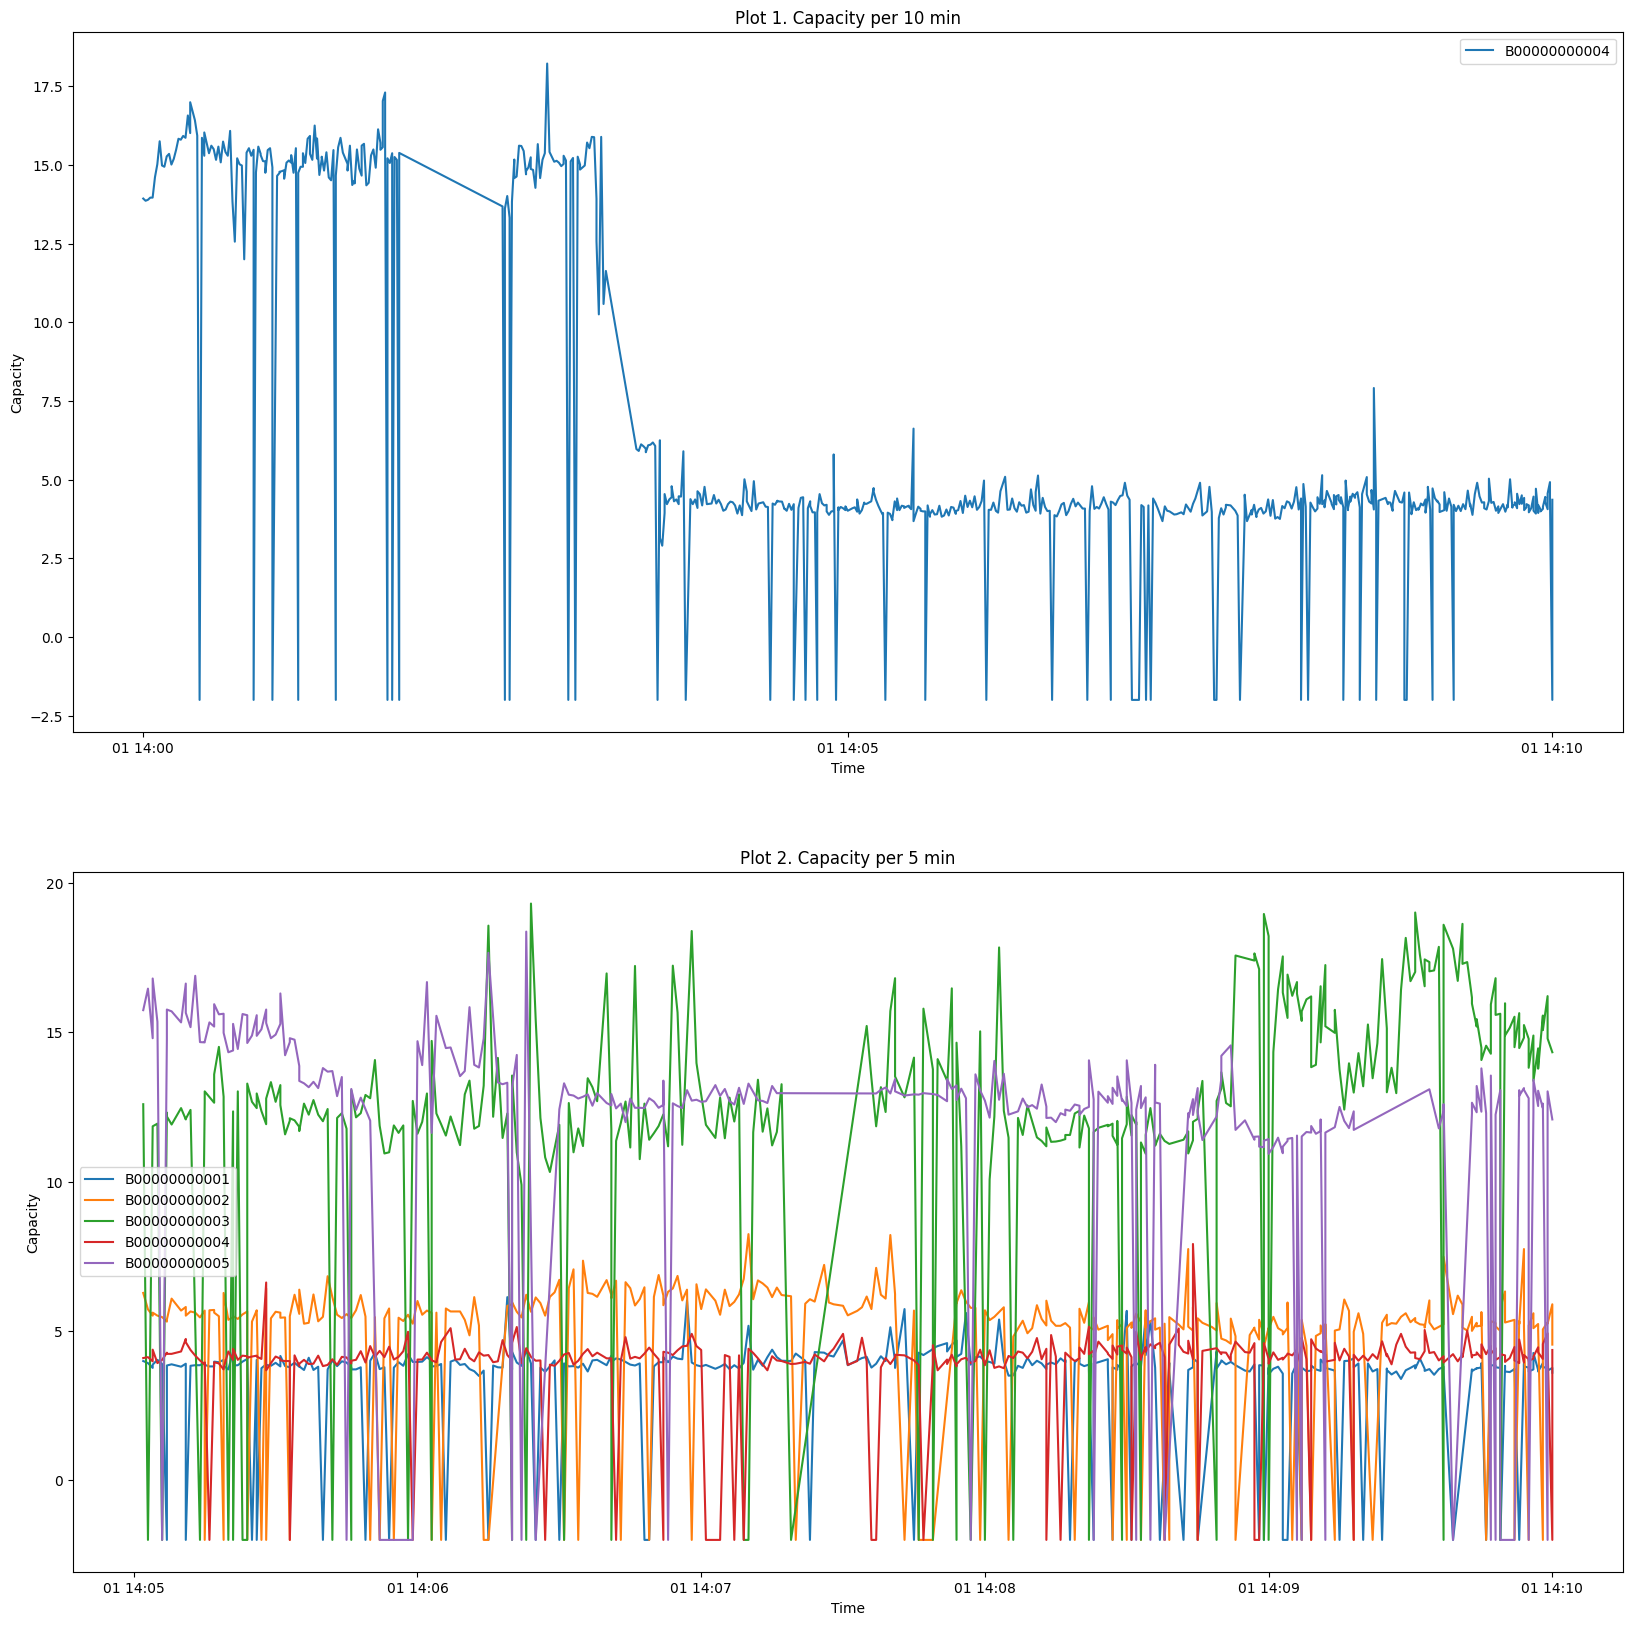

In [ ]:
n_log1_file = open(gc_folder + '/lab_works_files/n_log1.txt', 'r')

timestamp_end_dt = datetime.datetime.strptime('14:10', '%H:%M')
devices_capacities = {
  'B00000000001': [],
  'B00000000002': [],
  'B00000000003': [],
  'B00000000004': [],
  'B00000000005': []
}

n_log1_file_lines = n_log1_file.readlines()
for line in n_log1_file_lines:
  if re.match(r'.*A00000000003 <--->.*KEEP', line):
    timestamp_match = re.match(r'\d{2}:\d{2}:\d{2}', line)
    timestamp_dt = datetime.datetime.strptime(timestamp_match.group(), '%H:%M:%S')

    if timestamp_dt > timestamp_end_dt:
      break

    capacity_arr_search = re.search(r'capacity_arr=\[(.*?)\]', line)
    capacitive_devices_search = re.search(r'capacitive_devices=\[(.*?)\]', line)

    if capacity_arr_search and capacitive_devices_search:
      capacity_arr = capacity_arr_search.group(1).split(',')
      capacitive_devices = capacitive_devices_search.group(1).split(',')

      for device_index, device in enumerate(capacitive_devices):
        devices_capacities[device].append((timestamp_dt, float(capacity_arr[device_index])))

fig = plt.figure()
plt.rcParams['figure.figsize'] = (20, 20)

ax_1 = fig.add_subplot(2, 1, 1)

capacities_times_list = list(map(lambda capacity: capacity[0], devices_capacities['B00000000004']))
capacities_values_list = list(map(lambda capacity: capacity[1], devices_capacities['B00000000004']))

ax_1.plot([x for x in capacities_times_list], [y for y in capacities_values_list], label = 'B00000000004')
ax_1.legend()

plt.title('Plot 1. B00000000004 Capacity per 10 min')
plt.xlabel('Time')
plt.ylabel('Capacity')

ax_2 = fig.add_subplot(2, 1, 2)

for device in devices_capacities:
  timestamp_dt_start = datetime.datetime.strptime('14:05', '%H:%M')
  filtered_devices_capacities = list(filter(lambda capacity: capacity[0] > timestamp_dt_start, devices_capacities[device]))

  capacities_times_list = list(map(lambda capacity: capacity[0], filtered_devices_capacities))
  capacities_values_list = list(map(lambda capacity: capacity[1], filtered_devices_capacities))

  ax_2.plot([x for x in capacities_times_list], [y for y in capacities_values_list], label = device)
  ax_2.legend()

plt.title('Plot 2. Capacity per 5 min')
plt.xlabel('Time')
plt.ylabel('Capacity')